In [39]:
import torch, gzip, matplotlib as mpl, pickle
import matplotlib.pyplot as plt
import pandas as pd

mpl.rcParams['image.cmap'] = 'gray'

In [8]:
data = None
with gzip.open('data/mnist.pkl.gz', 'rb') as f:
    data = pickle.load(f, encoding='latin')

In [11]:
((x_train, y_train), (x_val, y_val), _) = data

In [12]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((50000, 784), (50000,), (10000, 784), (10000,))

In [13]:
(x_train, y_train, x_val, y_val) = map(torch.tensor, (x_train, y_train, x_val, y_val))
x_train.shape, y_train.shape, x_val.shape, y_val.shape

(torch.Size([50000, 784]),
 torch.Size([50000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [14]:
x_imgs = x_train.view(-1, 28, 28)
xval_imgs = x_val.view(-1, 28, 28)

In [15]:
x_imgs.shape

torch.Size([50000, 28, 28])

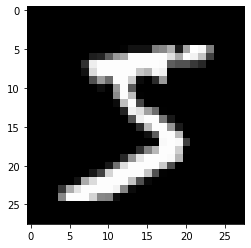

In [18]:
plt.imshow(x_imgs[0])

In [19]:
img3 = x_imgs[7]

In [32]:
mpl.rcParams['figure.dpi'] = 80

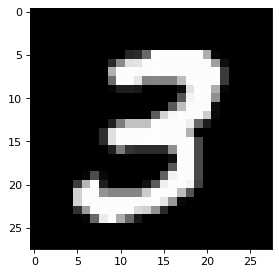

In [33]:
plt.imshow(img3)

In [34]:
top_edges = torch.tensor([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

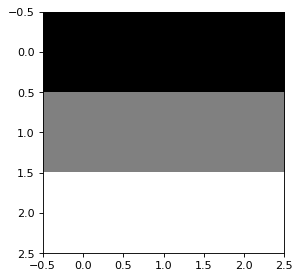

In [37]:
plt.imshow(top_edges)

In [51]:
df = pd.DataFrame(img3[:13, :23])
df.style

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148438,0.167969,0.410156,0.996094,0.988281,0.988281,0.988281,0.988281,0.988281,0.679688,0.023438,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167969,0.542969,0.875000,0.882812,0.984375,0.988281,0.984375,0.984375,0.984375,0.984375,0.984375,0.984375,0.617188,0.054688
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.695312,0.984375,0.984375,0.984375,0.984375,0.988281,0.984375,0.984375,0.984375,0.984375,0.984375,0.984375,0.984375,0.230469
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.425781,0.984375,0.984375,0.898438,0.515625,0.519531,0.515625,0.515625,0.738281,0.984375,0.984375,0.984375,0.984375,0.230469
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.113281,0.113281,0.093750,0.000000,0.000000,0.000000,0.000000,0.054688,0.882812,0.984375,0.984375,0.671875,0.027344


In [57]:
(img3[3:6, 14:17] * top_edges).sum()

tensor(2.9727)

In [62]:
(img3[7:10, 14:17] * top_edges).sum()

tensor(-2.9570)

In [67]:
def apply_kernel(row, col, kernel):
    return (img3[row-1:row+2, col-1:col+2] * kernel).sum()

In [68]:
apply_kernel(4, 15, top_edges)

tensor(2.9727)

In [74]:
[[(i, j) for j in range(3)] for i in range(4)]

[[(0, 0), (0, 1), (0, 2)],
 [(1, 0), (1, 1), (1, 2)],
 [(2, 0), (2, 1), (2, 2)],
 [(3, 0), (3, 1), (3, 2)]]

In [75]:
rng = range(1, 27)

In [77]:
top_edge3 = [[apply_kernel(i, j, top_edges) for j in rng] for i in rng]

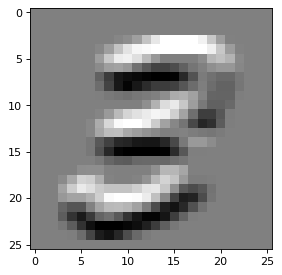

In [78]:
plt.imshow(top_edge3)

In [79]:
left_edge = torch.tensor([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

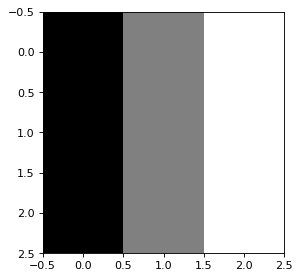

In [80]:
plt.imshow(left_edge)

In [81]:
left_edge3 = [[apply_kernel(i, j, left_edge) for j in rng] for i in rng]

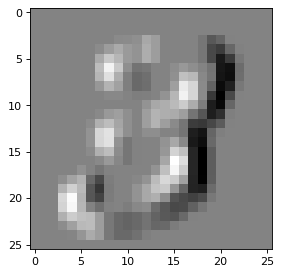

In [82]:
plt.imshow(left_edge3)

In [88]:
img3.shape

torch.Size([28, 28])

In [94]:
inp = img3[None,None,:,:]
inp.shape

torch.Size([1, 1, 28, 28])

In [124]:
inp_unf = F.unfold(inp, (3, 3))[0]
inp_unf.shape

torch.Size([9, 676])

In [128]:
left_edge

tensor([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]])

In [134]:
w = left_edge.view(-1).float()
w.shape

torch.Size([9])

In [135]:
out_unf = w@inp_unf

In [138]:
out_unf.shape

torch.Size([676])

In [146]:
out = out_unf.view(26, 26)

In [147]:
out.shape

torch.Size([26, 26])

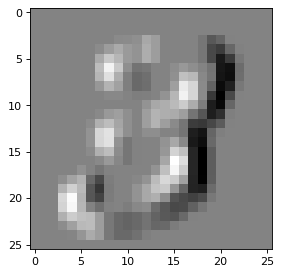

In [148]:
plt.imshow(out)

In [154]:
import pdb

In [165]:
def fnx(n):
#     pdb.set_trace()
    for i in range(n):
        print(f'hello {i+1}')

In [166]:
fnx(5)

hello 1
hello 2
hello 3
hello 4
hello 5
